#### Kriteriet er kopla til eit læringsmålData ready to use
(a) The final data is such that each row in the data corresponds to exactly 1 score that should be predicted.<br>
(b) The data does not leak any information (using player statistics of a given year to predict a score that happened in the same year).<br>
(c) The features in the final data are reasonable<br>

#### Kriteriet er kopla til eit læringsmålData description
(a) The different raw datasets as well as the combined datasets are described appropriately. <br>
(b) Some basic visualizations of the data that allows us to understand basic properties are available and explained.

#### Kriteriet er kopla til eit læringsmålReport
(a) The report is clear, well-written and understandable. <br>
(b) The code is readable and documented.<br>

#### 1
you have really done an amazing job here, you have removed all the useless data and you have only extracted all the relevevant data from the games dataframe! you are really close to having the finished dataframe! i would reccomend you to watch the lecture Nello had at the 13.09 at 01.38 hours into the video as he explains how the clean dataframe should look there. to sumarize i would say that it should have 1 row saying "x team played against y team at Home" and then the next row covers the same match saying that "y team played agains x team Away". nello explains it better in the video.


#### 2
you have really done an amazing job to describe and to explore the different raw datasets, they are explained in great detail. the visualizations you have done are well explained why you do them, how they are relevant, and they are easy to read.

#### 3 
you have done a great job explaining every part of the process, but the code could have more comments to make it more readable for others, this is quite minor though as the explanations often explain what you are doing and why you are doing it. only thing that is missing is for you to write how you are doing it.

#### notes
you have really done a great job with this task! the problem i have with task 1a is really not that major as i feel like the task isnt that well explained. if you fix that issue and add some more comments, then the task has been done perfectly!

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

#### Read data into dataframes

In [2]:
games2020 = pd.DataFrame(pd.read_html("../data/2020/games.xls", encoding="UTF-8")[0])
games2019 = pd.DataFrame(pd.read_html("../data/2019/games.xls", encoding="UTF-8")[0])
games2018 = pd.DataFrame(pd.read_html("../data/2018/games.xls", encoding="UTF-8")[0])
games2017 = pd.DataFrame(pd.read_html("../data/2017/games.xls", encoding="UTF-8")[0])

table2019 = pd.DataFrame(pd.read_html("../data/2019/table.xls", encoding="UTF-8")[0])
table2018 = pd.DataFrame(pd.read_html("../data/2018/table.xls", encoding="UTF-8")[0])
table2017 = pd.DataFrame(pd.read_html("../data/2017/table.xls", encoding="UTF-8")[0])

team2019 = pd.DataFrame(pd.read_html("../data/2019/team-stats.xls", encoding="UTF-8")[0])
team2018 = pd.DataFrame(pd.read_html("../data/2018/team-stats.xls", encoding="UTF-8")[0])
team2017 = pd.DataFrame(pd.read_html("../data/2017/team-stats.xls", encoding="UTF-8")[0])

player2020 = pd.DataFrame(pd.read_html("../data/2020/player-stats.xls", encoding="UTF-8")[0])
player2019 = pd.DataFrame(pd.read_html("../data/2019/player-stats.xls", encoding="UTF-8")[0])
player2018 = pd.DataFrame(pd.read_html("../data/2018/player-stats.xls", encoding="UTF-8")[0])
player2017 = pd.DataFrame(pd.read_html("../data/2017/player-stats.xls", encoding="UTF-8")[0])


### Explore data

I can see below the only information given in the 2020 data is week, date, time, teams and venue. While games data from earlier seasons contains referee as well. Then referee will not be in the training data, since the data to predict should look similar to the training data.

In [3]:
print("----2020----")
print("Shape: ", games2020.shape)
print("Columns: ", games2020.columns)
print("Nans: ", games2020.isnull().sum().sum())
games2020.head()

----2020----
Shape:  (112, 6)
Columns:  Index(['Wk', 'Date', 'Time', 'Home', 'Away', 'Venue'], dtype='object')
Nans:  122


,Wk,Date,Time,Home,Away,Venue
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2020-07-03,19:45,Trondheims-Ørn,LSK Kvinner,Ørn Arena
2,1.0,2020-07-04,11:30,Røa,Arna-Bjørnar,Røabanen
3,1.0,2020-07-04,13:00,Avaldsnes,Lyn,Avaldsnes Idrettssenter
4,1.0,2020-07-04,14:00,Sandviken,Vålerenga,Stemmemyren kunstgressbane


In [4]:
print("----2019----")
print("Shape: ", games2019.shape)
print("Columns: ", games2019.columns)
print("Nans: ", games2019.isnull().sum().sum())

#Removes Round column since its just at 2019 table, and not informative with the same values except for two matches
games2019 = games2019.drop(["Round"], axis=1)

games2019.head()

----2019----
Shape:  (160, 13)
Columns:  Index(['Round', 'Wk', 'Day', 'Date', 'Time', 'Home', 'Score', 'Away',
       'Attendance', 'Venue', 'Referee', 'Match Report', 'Notes'],
      dtype='object')
Nans:  477


,Wk,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2019-03-23,14:00,LSK Kvinner,4–3,Kolbotn,260.0,LSK-hallen,Henrikke Holm Nervik,Match Report,NaN
1,1.0,Sat,2019-03-23,14:00,Sandviken,0–2,Røa,442.0,Stemmemyren kunstgressbane,Malin Frantzen Øiseth,Match Report,NaN
2,1.0,Sat,2019-03-23,15:00,Klepp,1–0,Avaldsnes,340.0,Klepp Stadion,Ingvild Aarland,Match Report,NaN
3,1.0,Sat,2019-03-23,15:00,Lyn,0–0,Fart,298.0,Telenor Arena,Karoline Marie Jensen,Match Report,NaN
4,1.0,Sun,2019-03-24,14:30,Trondheims-Ørn,0–0,Arna-Bjørnar,205.0,Ørn Arena,Sarah Fatemeh Zangeneh,Match Report,NaN


The table data contains information about how a season ended. This can be used to predict the following season.

In [5]:
print("----Table 2018----")
print("Shape: ", table2018.shape)
print("Columns: ", table2018.columns)
print("Nans: ", table2018.isnull().sum().sum())
table2018.head()

----Table 2018----
Shape:  (12, 14)
Columns:  Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes'],
      dtype='object')
Nans:  9


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,LSK Kvinner,22,20,1,1,71,15,56,61,348,Guro Reiten - 21,Cecilie Fiskerstrand,→ Champions League via league finish
1,2,Klepp,22,15,3,4,39,21,18,48,278,Hege Hansen - 10,Lindsey Harris,NaN
2,3,Arna-Bjørnar,22,11,6,5,53,26,27,39,234,Maria Brochmann - 15,Mackenzie Arnold,NaN
3,4,Sandviken,22,11,6,5,42,29,13,39,390,Ajara Nchout - 15,Nora Neset Gjøen,NaN
4,5,Kolbotn,22,11,6,5,34,35,-1,39,223,Karina Sævik - 9,Aurora Mikalsen,NaN


The player stats table contains stats for every player in the league for the given season. To use all this information to predict scores the following season I think will lead to a too complex model. If it should take all players into account there will be a lot of features on a relative small dataset. It could be interesting to see if the teams with the top goal scorers the previous season have some impact if they for example switch team, but i will probably not add this.

In [6]:
print("----Player Stats 2017----")
print("Shape: ", player2017.shape)
print("Columns: ", player2017.columns[0])
print("Nans: ", player2017.isnull().sum().sum())
player2017

----Player Stats 2017----
Shape:  (260, 24)
Columns:  ('Unnamed: 0_level_0', 'Rk')
Nans:  1056


Unnamed: 0_level_0          Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk                      Player             Nation   
0                    1      Marianne Aamot Linaker             no NOR   
1                    2           Meryll Abrahamsen             no NOR   
2                    3                Julie Adserø             no NOR   
3                    4         Ine Agnethe Aarskog             no NOR   
4                    5                Teigen Allen             au AUS   
..                 ...                         ...                ...   
255                256            Lisa-Marie Woods             no NOR   
256                257               Kirsty Yallop             nz NZL   
257                258  Gunnhildur Yrsa Jónsdóttir             is ISL   
258                259              Emilie Østerås             no NOR   
259                260                  Vilde Øyri             no NOR   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                   Pos              Squad                Age   
0                   DF            Medkila               34.0   
1                   DF          Avaldsnes               19.0   
2                   MF     Trondheims-Ørn               25.0   
3                   DF              Klepp               17.0   
4                   DF          Vålerenga               22.0   
..                 ...                ...                ...   
255                 MF          Avaldsnes               32.0   
256                 MF              Klepp               30.0   
257                 MF          Vålerenga               28.0   
258                 MF          Vålerenga               14.0   
259                 FW          Sandviken               22.0   

    Unnamed: 6_level_0 Playing Time               ... Performance             \
                  Born           MP Starts   Min  ...          PK PKatt CrdY   
0               1982.0            4      4   359  ...           0     0    0   
1               1997.0           17     11   945  ...           0     0    4   
2               1991.0            9      9   791  ...           0     0    1   
3               2000.0            3      1   165  ...           0     0    0   
4               1994.0            4      3   266  ...           0     0    1   
..                 ...          ...    ...   ...  ...         ...   ...  ...   
255             1984.0            8      8   645  ...           0     0    0   
256             1986.0           22     22  1926  ...           2     2    2   
257             1988.0           21     21  1890  ...           0     0    1   
258             2002.0            2      0    52  ...           0     0    0   
259             1994.0           10      3   374  ...           0     0    0   

         Per 90 Minutes                      Unnamed: 23_level_0  
    CrdR            Gls Ast G+A  G-PK G+A-PK             Matches  
0      0           0.00 NaN NaN  0.00    NaN             Matches  
1      0           0.10 NaN NaN  0.10    NaN             Matches  
2      0           0.57 NaN NaN  0.57    NaN             Matches  
3      0           0.00 NaN NaN  0.00    NaN             Matches  
4      1           0.00 NaN NaN  0.00    NaN             Matches  
..   ...            ...  ..  ..   ...    ...                 ...  
255    0           0.00 NaN NaN  0.00    NaN             Matches  
256    0           0.14 NaN NaN  0.05    NaN             Matches  
257    0           0.24 NaN NaN  0.24    NaN             Matches  
258    0           1.73 NaN NaN  1.73    NaN             Matches  
259    0           0.24 NaN NaN  0.24    NaN             Matches  

[260 rows x 24 columns]

The team stats contains some stats like per-90 goals/assists with and without penalties, as well as cards. The only information relevant for prediction goals is the goal information, hence this table doesnt provide that much info compared to the table-dataframe. I have some domain-knowledge about football and I know for sure stuff like yellow and card stats doesn't impact the following seasons goal stats.

In [7]:
print("----Team Stats 2018----")
print("Shape: ", team2018.shape)
print("Columns: ", team2018.columns[0])
print("Nans: ", team2018.isnull().sum().sum())
team2018

----Team Stats 2018----
Shape:  (12, 20)
Columns:  ('Unnamed: 0_level_0', 'Squad')
Nans:  60


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                Squad               # Pl                Age   
0        Arna-Bjørnar                 20               21.9   
1           Avaldsnes                 25               24.0   
2          Grand Bodø                 23               23.4   
3               Klepp                 19               25.1   
4             Kolbotn                 21               21.2   
5         LSK Kvinner                 18               24.1   
6                 Lyn                 23               19.8   
7                 Røa                 23               22.7   
8           Sandviken                 24               26.4   
9              Stabæk                 26               23.6   
10     Trondheims-Ørn                 21               21.8   
11          Vålerenga                 26               25.6   

   Unnamed: 3_level_0 Playing Time                    Performance              \
                 Poss           MP Starts   Min   90s         Gls Ast G-PK PK   
0                 NaN           22    242  1980  22.0          52 NaN   51  1   
1                 NaN           22    242  1980  22.0          24 NaN   21  3   
2                 NaN           22    242  1980  22.0          19 NaN   18  1   
3                 NaN           22    242  1980  22.0          39 NaN   37  2   
4                 NaN           22    242  1980  22.0          34 NaN   32  2   
5                 NaN           22    242  1980  22.0          68 NaN   64  4   
6                 NaN           22    242  1980  22.0          26 NaN   24  2   
7                 NaN           22    242  1980  22.0          40 NaN   38  2   
8                 NaN           22    242  1980  22.0          40 NaN   40  0   
9                 NaN           22    242  1980  22.0          29 NaN   29  0   
10                NaN           22    242  1980  22.0          25 NaN   24  1   
11                NaN           22    242  1980  22.0          36 NaN   32  4   

                   Per 90 Minutes                       
   PKatt CrdY CrdR            Gls Ast G+A  G-PK G+A-PK  
0      1   11    1           2.36 NaN NaN  2.32    NaN  
1      3   22    1           1.09 NaN NaN  0.95    NaN  
2      1   16    0           0.86 NaN NaN  0.82    NaN  
3      2   12    0           1.77 NaN NaN  1.68    NaN  
4      2   11    0           1.55 NaN NaN  1.45    NaN  
5      4    6    0           3.09 NaN NaN  2.91    NaN  
6      2   19    0           1.18 NaN NaN  1.09    NaN  
7      2   28    0           1.82 NaN NaN  1.73    NaN  
8      0   15    1           1.82 NaN NaN  1.82    NaN  
9      0    7    0           1.32 NaN NaN  1.32    NaN  
10     1   15    1           1.14 NaN NaN  1.09    NaN  
11     4   27    1           1.64 NaN NaN  1.45    NaN

#### Drop columns

I would like to conactenate the date tables(2017-2019) since thats where I think most of the relevant information is. I think the venue column is ambigous since its already defined a home team which I assume always play on the same venue. I will also remove the referee column since it's not present in the 2020 data we are going to predict. I would like to have some sort of form-last-5-matches feature, but since we are going to predict the whole 2020 season at once we can't exploit teams form. Therefore I also will remove week, date and day columns since time of year wont matter much.

In [8]:
#Concatenate the tables with result data
data = pd.concat([games2017, games2018, games2019])

#### Remove NaNs

In [9]:
print("NaNs in Match report column: ", data["Match Report"].isna().sum())
print("Unique values: ", data["Match Report"].unique(), " => the column doesnt provide any information.")



print("NaNs in Notes column: ", data["Notes"].isna().sum() , "/" , len(data["Notes"]), " => almost only nans, and doesnt provide information.")
#print("NaNs in Round column: ", data["Round"].isna().sum() , "/" , len(data["Round"]), "Values are: ", data["Round"].unique(),  " => much naans, and just a few matches which are not regular season. Doesnt provide information.")

#Removes useless columns
data = data.drop(["Match Report", "Notes", "Venue", "Referee", "Day", "Wk"], axis=1)
games2020 = games2020.drop(["Venue", "Wk"], axis=1)
print("Removes columns Match Report, Venue, Referee, Day and Notes.")
data.head()

NaNs in Match report column:  81
Unique values:  ['Match Report' nan]  => the column doesnt provide any information.
NaNs in Notes column:  477 / 479  => almost only nans, and doesnt provide information.
Removes columns Match Report, Venue, Referee, Day and Notes.


,Date,Time,Home,Score,Away,Attendance
0,2017-04-17,13:00,Medkila,1–1,Sandviken,307.0
1,2017-04-17,14:00,Avaldsnes,2–1,Vålerenga,346.0
2,2017-04-17,15:00,Grand Bodø,2–2,Arna-Bjørnar,290.0
3,2017-04-17,15:00,Røa,1–2,Stabæk,348.0
4,2017-04-17,15:00,LSK Kvinner,6–1,Klepp,280.0



We can see below that there is alot of NaNs left. After removing all empty rows, there are just a few NaNs left in attendance column which I will remove as well as week column in 2020 data. If I was to use the attendance data I would probably just fill the NaNs with the mean of attendance for the home team.

In [10]:
print(data.isna().sum())
data = data.dropna(how="all")
games2020 = games2020.dropna(how="all")
print("Training data: \n", data.isna().sum())
print("2020 data: \n ", games2020.isna().sum())

Date          81
Time          81
Home          81
Score         81
Away          81
Attendance    86
dtype: int64
Training data: 
 Date          0
Time          0
Home          0
Score         0
Away          0
Attendance    5
dtype: int64
2020 data: 
  Date    0
Time    0
Home    0
Away    0
dtype: int64


## Visualization
What I want to know by visualizing the data is what affects how many goals a team scores and concedes, hence make it easier to enigneering features, and know what to use.

I plot the distribution of results in the data to see if there are results that occur much more than others. I want the model to predict scores from the information given rather than make predictions sampled from a distribution which could be the case if there was a clear most common result.

<AxesSubplot:title={'center':'Results Distribution'}, xlabel='Results'>

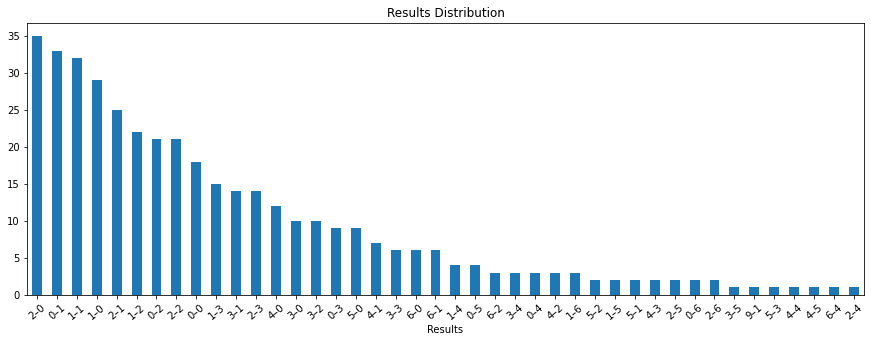

In [11]:
data["Score"].value_counts().plot(kind='bar', figsize = (15,5), title="Results Distribution",xlabel="Results", rot=40, fontsize=10)

I check the correlation between goals and goals conceded compared to the same stat previous seasons. I can see that it is a correlation(about 0,40-0,50) for goal stats two following seasons, but it looks like its not a point to look any longer than one season back since the correlation is significant less. I also note that there is a strong correlation between goals scored and goals conceded. The sample size is small here, so there might be some noise in the data.

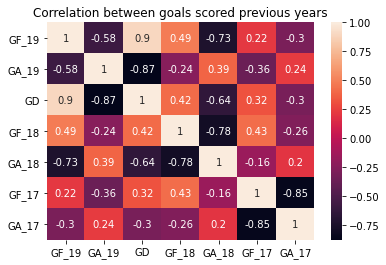

In [12]:
# Feature correlation matrix
table_data = table2019.iloc[:, 1:9]

#Gets 2018 goal data
merged = pd.merge(left=table_data, right=table2018, on='Squad', suffixes=("_c", "_p"))
table_data["GF_18"], table_data["GA_18"] = merged["GF_p"], merged["GA_p"]

#Get 2017 goal data
merged2 = pd.merge(left=table_data, right=table2017, on='Squad', suffixes=("_c", "_2p"))
table_data["GF_17"], table_data["GA_17"] = merged2["GF_2p"], merged2["GA_2p"]

table_data = table_data.dropna().iloc[:, 5:]
table_data = table_data.rename(columns={"GF" : "GF_19", "GA" : "GA_19", "G_D": "GD19"})
corr = table_data.corr()

sn.heatmap(corr, annot=True)
plt.title("Correlation between goals scored previous years")
plt.show()

#Maybe check correlation of score in same match previous years

## Feature Engineering

Instead of have a column as result string, I make two separate integer columns with home_score and away_scores which makes more sense to predict. Ints makes more sense than strings since the values of the column depends on each other (6 is closer to 5 than 1).

In [13]:
goals = data["Score"].str.split("–", n = 0, expand = True)
data["home_score"] = goals[0].astype(int)
data["away_score"] = goals[1].astype(int)
data = data.drop("Score", axis=1)

data

,Date,Time,Home,Away,Attendance,home_score,away_score
0,2017-04-17,13:00,Medkila,Sandviken,307.0,1,1
1,2017-04-17,14:00,Avaldsnes,Vålerenga,346.0,2,1
2,2017-04-17,15:00,Grand Bodø,Arna-Bjørnar,290.0,2,2
3,2017-04-17,15:00,Røa,Stabæk,348.0,1,2
4,2017-04-17,15:00,LSK Kvinner,Klepp,280.0,6,1
...,...,...,...,...,...,...,...
154,2019-11-16,13:00,Kolbotn,Lyn,84.0,0,0
155,2019-11-16,13:00,Arna-Bjørnar,Vålerenga,185.0,0,2
156,2019-11-16,13:00,Fart,Klepp,93.0,1,6
158,2019-11-24,16:00,IF Fløya,Lyn,350.0,0,5


The last features I would like to add is the goals scored and goals conceded last season for both home- and away team, since I could see thay they had some correlation with goals scored/conceded the season after. The teams that was in a lower divison the previos season doesnt have any data for goals scored conceded. Rather than have no information for the previos season features for promoted teams, I may add some numbers according to the weaker teams in the previos season in the top division, assuming teams that comes straight from a lower divsion wont do very well. I will try this later when tuning the model.

In [14]:

def add_previous_data(df):
    #Home/away previous season Goald scored/conceded
    df["hp_GS"] = 0.0
    df["hp_GA"] = 0.0
    df["ap_GS"] = 0.0
    df["ap_GA"] = 0.0

    #For 2017 i just use 2017 data as well for now since there is no older data 
    years_to_previous_table = {"2020" : table2019, "2019" : table2018, "2018" : table2017, "2017" : table2017}

    for i, row in df.iterrows():
        season = row["Date"][0:4]
        h_team = row["Home"]
        a_team = row["Away"]
        matches_played = 22

        table = years_to_previous_table[season]

        if h_team in table["Squad"].unique():
            #Per 90 stats
            df.at[i, "hp_GS"] = table["GF"][table["Squad"]==h_team].values[0] / 22
            df.at[i, "hp_GA"] = table["GA"][table["Squad"]==h_team].values[0] / 22


        if a_team in table["Squad"].unique():
            df.at[i, "ap_GS"] = float(table["GF"][table["Squad"]==a_team].values[0]) / 22
            df.at[i, "ap_GA"] = float(table["GA"][table["Squad"]==a_team].values[0]) / 22
            
    return df

#Adds data for previous season
data = add_previous_data(df=data)
games2020 = add_previous_data(df=games2020)
games2020.head()

,Date,Time,Home,Away,hp_GS,hp_GA,ap_GS,ap_GA
1,2020-07-03,19:45,Trondheims-Ørn,LSK Kvinner,1.181818,1.000000,2.318182,0.818182
2,2020-07-04,11:30,Røa,Arna-Bjørnar,1.818182,1.590909,1.181818,1.863636
3,2020-07-04,13:00,Avaldsnes,Lyn,1.818182,1.500000,1.045455,1.681818
4,2020-07-04,14:00,Sandviken,Vålerenga,1.954545,1.454545,1.863636,1.090909
5,2020-07-05,15:00,Klepp,Kolbotn,2.181818,0.863636,1.590909,1.772727


In [15]:
data.head()

,Date,Time,Home,Away,Attendance,home_score,away_score,hp_GS,hp_GA,ap_GS,ap_GA
0,2017-04-17,13:00,Medkila,Sandviken,307.0,1,1,3.227273,0.681818,1.545455,1.590909
1,2017-04-17,14:00,Avaldsnes,Vålerenga,346.0,2,1,1.909091,1.318182,1.909091,1.909091
2,2017-04-17,15:00,Grand Bodø,Arna-Bjørnar,290.0,2,2,1.772727,0.954545,1.090909,1.727273
3,2017-04-17,15:00,Røa,Stabæk,348.0,1,2,1.227273,2.545455,2.090909,1.045455
4,2017-04-17,15:00,LSK Kvinner,Klepp,280.0,6,1,1.136364,2.181818,2.409091,1.181818


I would also like to make a one-hot-encoding of the teams since it's easier to work with instead of categorical variables. Its a one-hot-vector both for home team and away team.

In [16]:
home_one_hot = pd.get_dummies(data["Home"], prefix="h")
away_one_hot = pd.get_dummies(data["Away"], prefix="a")
data = data.drop("Home", axis = 1)
data = data.drop("Away", axis = 1)
data = pd.concat([data, home_one_hot], axis=1)
data = pd.concat([data, away_one_hot], axis=1)

#And for 2020 games
home_one_hot = pd.get_dummies(games2020["Home"], prefix="h")
away_one_hot = pd.get_dummies(games2020["Away"], prefix="a")
games2020 = games2020.drop("Home", axis = 1)
games2020 = games2020.drop("Away", axis = 1)
games2020 = pd.concat([games2020, home_one_hot], axis=1)
games2020 = pd.concat([games2020, away_one_hot], axis=1)


Drops unecessary features.

In [17]:
data = data.drop(["Date", "Attendance", "Time"], axis=1)
games2020 = games2020.drop(["Date","Time"], axis=1)

Split training set into X and Y for ML model. Also makes sure games2020 table contains same columns as the training data since some teams is in the training set which not is in the 2020 data.

In [18]:
#Split data in X and y for ML model to use
y = data.iloc[:, 0:2]
X = data.drop(["home_score", "away_score"], axis=1)
              
col_X = X.columns
col_games = games2020.columns

missing_columns = [x for x in col_X if x not in col_games]
games2020[missing_columns] = 0

Now both the training data and prediction data is a 34 dimensional numeric data in the same format ready to use. The labels(scores) can easily be splitted from the training set. I makes sure I store a versions of the dataframes where the columns are sorted in the same way such that the input vectors will correspond to the same features for both training and test set.

In [19]:
X_sorted = X.reindex(sorted(X.columns), axis=1)
games2020_sorted = games2020.reindex(sorted(games2020.columns), axis=1)

hp_GS = home team, goals scored previous season per 90 <br/>
hp_GA = home team, goals against previous season per 90 <br/>
ap_GS = away team, goals scored previous season per 90 <br/>
ap_GC = away team, goals against previous season per 90 <br/>

In [20]:
print(X.shape)
X.head()

(398, 34)


,hp_GS,hp_GA,ap_GS,ap_GA,h_Arna-Bjørnar,h_Avaldsnes,h_Fart,h_Grand Bodø,h_IF Fløya,h_Klepp,...,a_Klepp,a_Kolbotn,a_LSK Kvinner,a_Lyn,a_Medkila,a_Røa,a_Sandviken,a_Stabæk,a_Trondheims-Ørn,a_Vålerenga
0,3.227273,0.681818,1.545455,1.590909,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.909091,1.318182,1.909091,1.909091,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.772727,0.954545,1.090909,1.727273,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.227273,2.545455,2.090909,1.045455,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.136364,2.181818,2.409091,1.181818,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
print(games2020.shape)
games2020.head()

(92, 34)


,hp_GS,hp_GA,ap_GS,ap_GA,h_Arna-Bjørnar,h_Avaldsnes,h_Klepp,h_Kolbotn,h_LSK Kvinner,h_Lyn,...,a_Trondheims-Ørn,a_Vålerenga,h_Fart,h_Grand Bodø,h_IF Fløya,h_Stabæk,a_Fart,a_Grand Bodø,a_IF Fløya,a_Stabæk
1,1.181818,1.000000,2.318182,0.818182,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.818182,1.590909,1.181818,1.863636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.818182,1.500000,1.045455,1.681818,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.954545,1.454545,1.863636,1.090909,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2.181818,0.863636,1.590909,1.772727,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
